In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import nltk
import re
import string
import contractions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
%matplotlib inline

C:\Users\10692373\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\10692373\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\10692373\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Exploratory Data Analysis 

In [2]:
movies_metadata=pd.read_csv('movies_metadata.csv')

C:\Users\10692373\AppData\Local\Temp\ipykernel_19764\2760034446.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata=pd.read_csv('movies_metadata.csv')


In [3]:
movies_metadata.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [4]:
movies_metadata.shape

(45466, 24)

In [5]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
credits=pd.read_csv('credits.csv')

In [7]:
credits.shape

(45476, 3)

In [8]:
credits.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [9]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [10]:
keywords=pd.read_csv('keywords.csv')

In [11]:
keywords.head()

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

In [12]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


<p> Checking the adult column and whether it is useful to keep or not </p>

In [13]:
movies_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

literal_eval is a function defined in “ast” class of built-in class library. AST stands for Abstract Syntax Tree. An Abstract Syntax Tree (AST) is a data structure used to reason about the grammar of a programming language in the context of the instructions provided into source code. literal_eval  converts expression expr to a Python object as long as expr is a string representation of bytes, a number, a tuple, a list, a dictionary, a set, a boolean, None, or another string.

In [14]:
type(movies_metadata['genres'][5])

str

In [15]:
movies_metadata['genres'] = movies_metadata['genres'].fillna('[]').apply(literal_eval) 

In [16]:
type(movies_metadata['genres'][5])

list

<p> In this step we are extracting genre from the name key in the list of dictionary. isinstance() function returns True if the object is specified types, and it will not match then return False. </p>

In [17]:
movies_metadata['genres']=movies_metadata['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [18]:
movies_metadata['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

In [19]:
movies_metadata['production_countries']=movies_metadata['production_countries'].fillna('[]').apply(literal_eval)

In [20]:
movies_metadata['production_countries']=movies_metadata['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [21]:
movies_metadata['production_countries']

0        [United States of America]
1        [United States of America]
2        [United States of America]
3        [United States of America]
4        [United States of America]
                    ...            
45461                        [Iran]
45462                 [Philippines]
45463    [United States of America]
45464                      [Russia]
45465              [United Kingdom]
Name: production_countries, Length: 45466, dtype: object

In [22]:
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [23]:
movies_metadata_num=movies_metadata.select_dtypes(exclude='object')
movies_metadata_num.head()

revenue  runtime  vote_average  vote_count
0  373554033.0     81.0           7.7      5415.0
1  262797249.0    104.0           6.9      2413.0
2          0.0    101.0           6.5        92.0
3   81452156.0    127.0           6.1        34.0
4   76578911.0    106.0           5.7       173.0

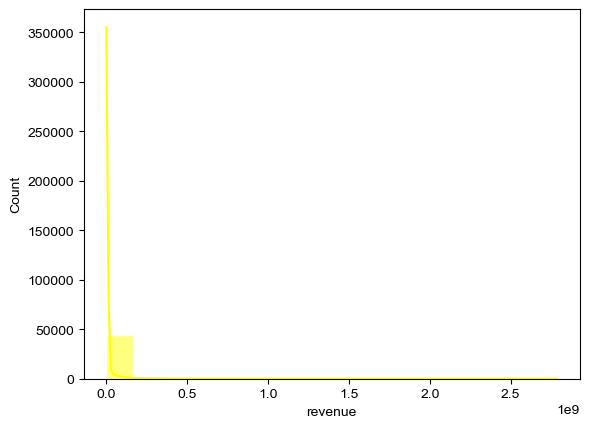

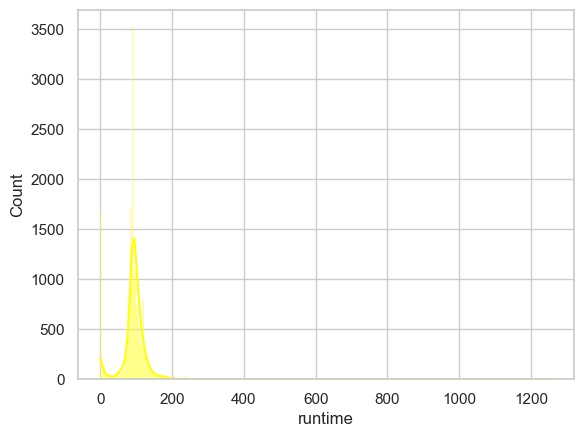

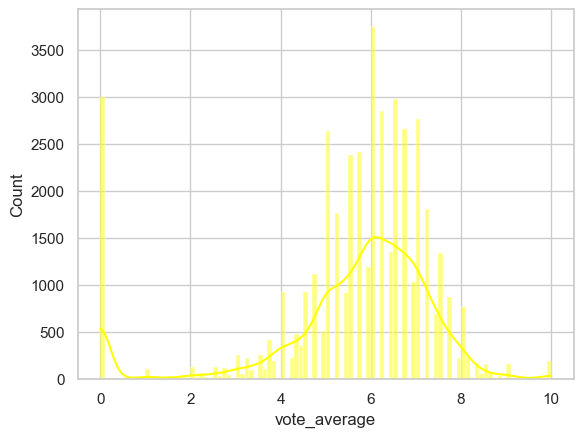

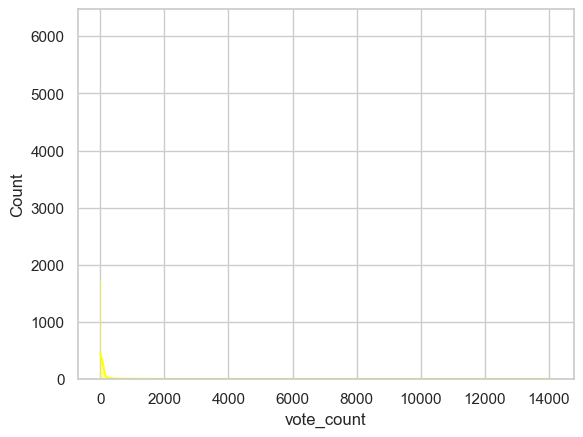

In [24]:
for i in movies_metadata_num:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.set_theme(style="whitegrid")
    sns.histplot(x=movies_metadata_num[i],color='yellow',kde=True) 

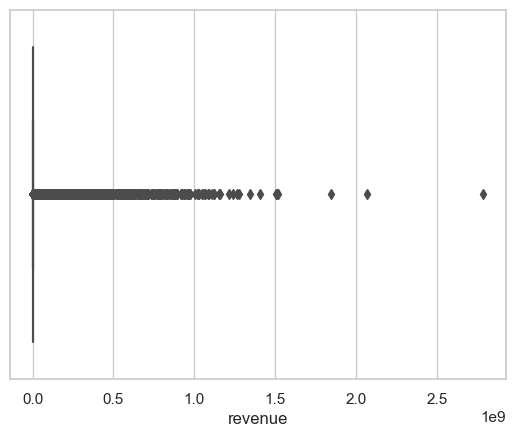

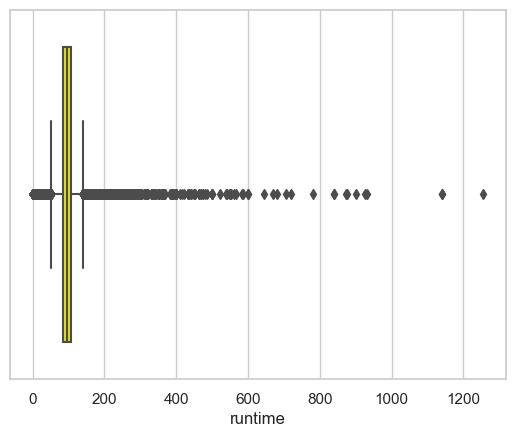

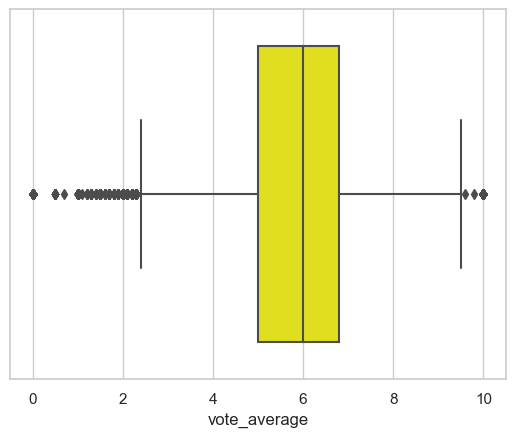

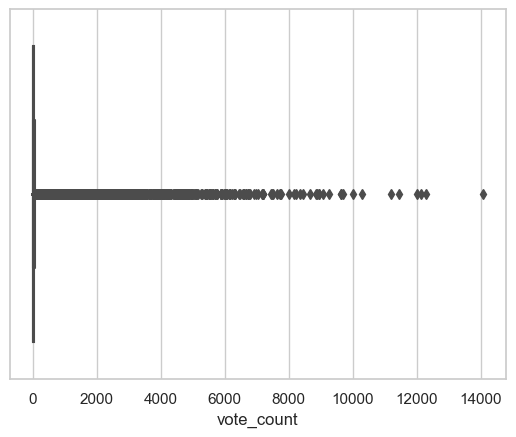

In [25]:
for i in movies_metadata_num:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=movies_metadata_num[i],color='yellow')

In [26]:
cols_to_remove=['adult','belongs_to_collection','budget','homepage','original_language','poster_path','production_companies',
                'release_date','runtime','spoken_languages','video','status', 'imdb_id']
movies_metadata.drop(columns=cols_to_remove,axis=1,inplace=True)

In [27]:
movies_metadata.shape

(45466, 11)

In [28]:
movies_metadata[movies_metadata['title'].isna()]

genres          id  \
19729                          [Action, Thriller, Drama]       82663   
19730  [Carousel Productions, Vision View Entertainme...  1997-08-20   
29502                       [Animation, Science Fiction]      122662   
29503  [Aniplex, GoHands, BROSTA TV, Mardock Scramble...  2012-09-29   
35586        [TV Movie, Action, Horror, Science Fiction]      249260   
35587  [Odyssey Media, Pulser Productions, Rogue Stat...  2014-01-01   

                                 original_title  \
19729                              Midnight Man   
19730  [{'iso_639_1': 'en', 'name': 'English'}]   
29502                          マルドゥック・スクランブル 排気   
29503      [{'iso_639_1': 'ja', 'name': '日本語'}]   
35586                          Avalanche Sharks   
35587  [{'iso_639_1': 'en', 'name': 'English'}]   

                                                overview  \
19729  British soldiers force a recently captured IRA...   
19730                                           Released   
29502         Third film of the Mardock Scramble series.   
29503                                           Released   
35586  A group of skiers are terrorized during spring...   
35587                                           Released   

                  popularity production_countries  revenue tagline title  \
19729                    NaN                   []      NaN     NaN   NaN   
19730                    NaN                   []      NaN     NaN   NaN   
29502                    NaN                   []      NaN     NaN   NaN   
29503                    NaN                   []      NaN     NaN   NaN   
35586                    NaN                   []      NaN     NaN   NaN   
35587  Beware Of Frost Bites                   []      NaN     NaN   NaN   

       vote_average  vote_count  
19729           NaN         NaN  
19730           NaN         NaN  
29502           NaN         NaN  
29503           NaN         NaN  
35586           NaN         NaN  
35587           NaN         NaN

In [29]:
movies_metadata.drop(labels=[19730,29503,35587],axis=0,inplace=True) # The reason to remove these rows is that they do not have a proper id 

In [30]:
movies_metadata['title'][19729]='Midnight Man'          # Filled these from original_title column name key 
movies_metadata['title'][35586]='Avalanche Sharks'
movies_metadata['title'][35587]='The Bowery Boys'

C:\Users\10692373\AppData\Local\Temp\ipykernel_19764\4151750489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata['title'][19729]='Midnight Man'          # Filled these from original_title column name key
C:\Users\10692373\AppData\Local\Temp\ipykernel_19764\4151750489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata['title'][35586]='Avalanche Sharks'
C:\Users\10692373\AppData\Local\Temp\ipykernel_19764\4151750489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [31]:
movies_metadata['title'] = movies_metadata['title'].astype('str')  # converting into str because we need to pass a string in word cloud 

In [32]:
title_corpus = ' '.join(movies_metadata['title']) 

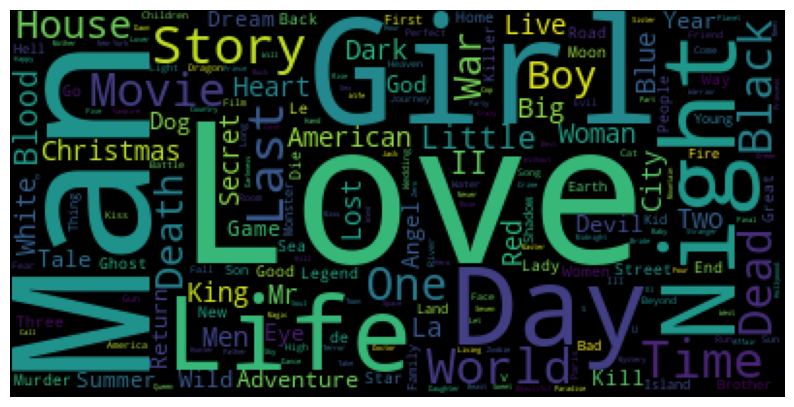

In [33]:
title_wordcloud = WordCloud(stopwords=STOPWORDS).generate(title_corpus)
plt.figure(figsize=(10,10))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [34]:
metadata_new=movies_metadata[movies_metadata['production_countries'].notnull()] 

In [35]:
metadata_new['production_countries']

0        [United States of America]
1        [United States of America]
2        [United States of America]
3        [United States of America]
4        [United States of America]
                    ...            
45461                        [Iran]
45462                 [Philippines]
45463    [United States of America]
45464                      [Russia]
45465              [United Kingdom]
Name: production_countries, Length: 45463, dtype: object

In [36]:
metadata_new['production_countries'] = [' '.join(map(str, l)) for l in metadata_new['production_countries']]

In [37]:
metadata_new=metadata_new.loc[metadata_new['production_countries']!='']

In [38]:
country_count=metadata_new['production_countries'].value_counts()

In [39]:
country_count=country_count[:9]

In [40]:
country_count

United States of America    17851
United Kingdom               2238
France                       1654
Japan                        1356
Italy                        1030
Canada                        840
Germany                       749
India                         735
Russia                        735
Name: production_countries, dtype: int64

In [41]:
country_production=pd.DataFrame(country_count).reset_index()

In [42]:
country_production.rename(columns={'index':'country','production_countries':'count'},inplace=True)

In [43]:
country_production

country  count
0  United States of America  17851
1            United Kingdom   2238
2                    France   1654
3                     Japan   1356
4                     Italy   1030
5                    Canada    840
6                   Germany    749
7                     India    735
8                    Russia    735

In [44]:
fig=px.choropleth(country_production,               
              locations="country",  
              locationmode="country names",
              color="count",
              scope="world",
              range_color=(500,20000),
              color_continuous_scale='burg',  
              height=600,
              
)

fig.update_geos(showocean=True,
               oceancolor="LightBlue",projection_type='lagrange')

In [45]:
m= movies_metadata['vote_count'].quantile(0.90) # Taking those comments that have more than 90% vote 

In [46]:
best_voted_movies = movies_metadata.copy().loc[movies_metadata['vote_count'] >= m].reset_index(drop=True)
best_voted_movies.shape

(4555, 11)

In [47]:
best_voted_movies.head()

genres     id               original_title  \
0       [Animation, Comedy, Family]    862                    Toy Story   
1      [Adventure, Fantasy, Family]   8844                      Jumanji   
2                          [Comedy]  11862  Father of the Bride Part II   
3  [Action, Crime, Drama, Thriller]    949                         Heat   
4     [Action, Adventure, Thriller]   9091                 Sudden Death   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...  21.946943   
1  When siblings Judy and Peter discover an encha...  17.015539   
2  Just when George Banks has recovered from his ...   8.387519   
3  Obsessive master thief, Neil McCauley leads a ...  17.924927   
4  International action superstar Jean Claude Van...    5.23158   

         production_countries      revenue  \
0  [United States of America]  373554033.0   
1  [United States of America]  262797249.0   
2  [United States of America]   76578911.0   
3  [United States of America]  187436818.0   
4  [United States of America]   64350171.0   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Just When His World Is Back To Normal... He's ...   
3                           A Los Angeles Crime Saga   
4                         Terror goes into overtime.   

                         title  vote_average  vote_count  
0                    Toy Story           7.7      5415.0  
1                      Jumanji           6.9      2413.0  
2  Father of the Bride Part II           5.7       173.0  
3                         Heat           7.7      1886.0  
4                 Sudden Death           5.5       174.0

In [48]:
best_voted_movies.isnull().sum()

genres                    0
id                        0
original_title            0
overview                  5
popularity                0
production_countries      0
revenue                   0
tagline                 487
title                     0
vote_average              0
vote_count                0
dtype: int64

In [49]:
best_voted_movies.dropna(axis=0,subset='overview', inplace=True)

In [50]:
best_voted_movies['overview'] = best_voted_movies['overview'].astype('str') 

In [51]:
overview_corpus = ' '.join(best_voted_movies['overview'])

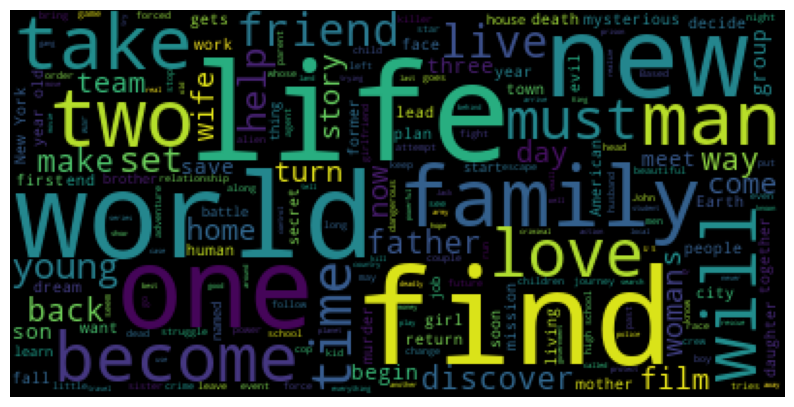

In [52]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS).generate(overview_corpus)
plt.figure(figsize=(10,10))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [53]:
stopword = nltk.corpus.stopwords.words('english')

In [54]:
lem=WordNetLemmatizer()

In [55]:
def clean_text(doc):
    doc=doc.lower()
    doc=doc.replace("-"," ")
    text=doc.translate(str.maketrans('', '', string.punctuation))
    text=re.findall(r'[a-zA-Z]+', text) 
    text=[contractions.fix(word) for word in text]
    text=[word for word in text if word not in stopword]
    text=[lem.lemmatize(word) for word in text]
    text1=' '.join(text)
    return text1

In [56]:
best_voted_movies['overview']=best_voted_movies['overview'].apply(lambda x: clean_text(x))

In [57]:
len(best_voted_movies['overview'])

4550

In [58]:
s=best_voted_movies[best_voted_movies['overview'].map(len)!=0]

In [59]:
len(s)

4550

# Calculating TF-IDF

<img src="https://miro.medium.com/max/1100/1*OY8nVCRod-EnoRiiRX3DKA.webp" >

<ul>t -> term </ul>
<ul>D -> set of documents </ul>
<ul>d -> document </ul>

<p> TF-IDF stands for term frequency-inverse document frequency. TF-IDF defines importance of a term by taking into consideration the importance of that term in a single document, and scaling it by its importance across all documents. </p>
    
<p>The function of term frequency is to determine how important a word is to a specific document. For example in the sentence <i>"The cat sat on the mat" </i>, term frequency for cat is  1/6. </p>


<img src="https://miro.medium.com/max/1100/1*6eUiQGkhZ9U0y5bXSz98mw.webp">


<p> Inverse document frequency determines how important a word is in all the documents. For example in the sentences, <i>The cat sat on the mat</i> and <i>The cat sat on the mat in the house</i>, house has an inverse document frequency of log(2/1). </p>

In [60]:
#  Making word vectors using TF-IDF
vectors = TfidfVectorizer()
word_matrix = vectors.fit_transform(s['overview'])

In [61]:
word_matrix.shape

(4550, 17835)

# Calculating cosine similarity matrix

<p> Cosine similarity is used to determine similarity between different vectors or documents. As the distance between the two vectors increases, the similarity decreases and vice versa. The values for cosine similarity ranges from 0 to 1. To find the cosine similarity, we need to calculate the angle between the vectors. When the vectors are perpendicular to each other, then we do not have any similarity, because cos 90=0 and when the vectors are overlapping then we have similarity=1, as cos 0=1. The formula for cosine similarity is:- </p>

<img src="https://miro.medium.com/max/640/1*CHTUjtaensX3H8pxh9lYLQ.webp">

<p> where A is the Point P1, B is the point P2. </p>

In [62]:
similarities = cosine_similarity(word_matrix)
print('pairwise dense output:\n {}\n'.format(similarities))

pairwise dense output:
 [[1.         0.01807153 0.         ... 0.         0.         0.        ]
 [0.01807153 1.         0.02461431 ... 0.         0.         0.        ]
 [0.         0.02461431 1.         ... 0.01976038 0.         0.        ]
 ...
 [0.         0.         0.01976038 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.02839282]
 [0.         0.         0.         ... 0.         0.02839282 1.        ]]



In [63]:
indices = pd.Series(best_voted_movies.index, index=best_voted_movies['title']) # index is used because we want to get the index of the titles

# Content based recommender

<p>In this recommender system we use additional information about users and/or items, instead of only user item interactions. The idea of content based methods is to try to build a model, based on the available features, that explain the observed user-item interactions.</p>

In [64]:
def get_recommendations(title, cosine_sim=similarities):
    idx=indices[title]  # fetching the indexes of the different titles
    sim_matrix = list(enumerate(cosine_sim[idx])) # Get the pairwise similarity scores of all movies with that movie
    sim_matrix=sorted(sim_matrix, key=lambda x: x[1], reverse=True) #sorting in decreasing order according to the given movie with other movies
    sim_matrix=sim_matrix[1:11] # Taking the top 10 movie scores
    movie_indices = [i[0] for i in sim_matrix]
    return best_voted_movies['title'].iloc[movie_indices] # returning the title along with the index of the movie

In [65]:
get_recommendations('Sudden Death')

1385    National Lampoon’s Van Wilder
1200                    Double Impact
1269                        Kickboxer
3317            Indie Game: The Movie
2394                    The Love Guru
3314                           Stolen
3241                         Dikkenek
3572                        Homefront
147              Hot Shots! Part Deux
2946                      Confessions
Name: title, dtype: object

In [66]:
get_recommendations('The Dark Knight')

3117                      The Dark Knight Rises
444                              Batman Returns
47                               Batman Forever
2824                 Batman: Under the Red Hood
3355    Batman: The Dark Knight Returns, Part 2
1943                              Batman Begins
3318    Batman: The Dark Knight Returns, Part 1
4362                   Batman: The Killing Joke
3762                  Batman: Assault on Arkham
4463                      The Lego Batman Movie
Name: title, dtype: object

## Creating a keywords, tagline, genre, cast and crew based content recommendation system

In [67]:
best_voted_movies['id']=best_voted_movies['id'].astype('int')

In [68]:
df = best_voted_movies.merge(keywords, on='id')

In [69]:
df=df.merge(credits, on='id')

In [70]:
df.head()

genres     id               original_title  \
0       [Animation, Comedy, Family]    862                    Toy Story   
1      [Adventure, Fantasy, Family]   8844                      Jumanji   
2                          [Comedy]  11862  Father of the Bride Part II   
3  [Action, Crime, Drama, Thriller]    949                         Heat   
4     [Action, Adventure, Thriller]   9091                 Sudden Death   

                                            overview popularity  \
0  led woody andys toy live happily room andys bi...  21.946943   
1  sibling judy peter discover enchanted board ga...  17.015539   
2  george bank recovered daughter wedding receive...   8.387519   
3  obsessive master thief neil mccauley lead top ...  17.924927   
4  international action superstar jean claude van...    5.23158   

         production_countries      revenue  \
0  [United States of America]  373554033.0   
1  [United States of America]  262797249.0   
2  [United States of America]   76578911.0   
3  [United States of America]  187436818.0   
4  [United States of America]   64350171.0   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Just When His World Is Back To Normal... He's ...   
3                           A Los Angeles Crime Saga   
4                         Terror goes into overtime.   

                         title  vote_average  vote_count  \
0                    Toy Story           7.7      5415.0   
1                      Jumanji           6.9      2413.0   
2  Father of the Bride Part II           5.7       173.0   
3                         Heat           7.7      1886.0   
4                 Sudden Death           5.5       174.0   

                                            keywords  \
0  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...   
1  [{'id': 10090, 'name': 'board game'}, {'id': 1...   
2  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...   
3  [{'id': 642, 'name': 'robbery'}, {'id': 703, '...   
4  [{'id': 949, 'name': 'terrorist'}, {'id': 1562...   

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 1, 'character': 'George Banks', '...   
3  [{'cast_id': 25, 'character': 'Lt. Vincent Han...   
4  [{'cast_id': 1, 'character': 'Darren Francis T...   

                                                crew  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...  
2  [{'credit_id': '52fe44959251416c75039ed7', 'de...  
3  [{'credit_id': '52fe4292c3a36847f802916d', 'de...  
4  [{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...

In [71]:
df[df['tagline'].isna()].head()

genres     id               original_title  \
0   [Animation, Comedy, Family]    862                    Toy Story   
7              [Comedy, Horror]  12110  Dracula: Dead and Loving It   
22                      [Drama]    687             Dead Man Walking   
29     [Comedy, Drama, Romance]  11010                   Il postino   
33     [Crime, Drama, Thriller]   2086                 Nick of Time   

                                             overview popularity  \
0   led woody andys toy live happily room andys bi...  21.946943   
7   lawyer show vampire doorstep fall prey charm j...   5.430331   
22  justice drama based true story man death row l...   6.891317   
29  simple italian postman learns love poetry deli...  10.168437   
33  gene watson public accountant arrives train un...   6.848591   

                          production_countries      revenue tagline  \
0                   [United States of America]  373554033.0     NaN   
7           [France, United States of America]          0.0     NaN   
22  [United States of America, United Kingdom]   39363635.0     NaN   
29                    [Belgium, France, Italy]          0.0     NaN   
33                  [United States of America]    8175346.0     NaN   

                          title  vote_average  vote_count  \
0                     Toy Story           7.7      5415.0   
7   Dracula: Dead and Loving It           5.7       210.0   
22             Dead Man Walking           7.3       350.0   
29                  The Postman           7.6       181.0   
33                 Nick of Time           6.1       190.0   

                                             keywords  \
0   [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...   
7   [{'id': 3633, 'name': 'dracula'}, {'id': 11931...   
22  [{'id': 378, 'name': 'prison'}, {'id': 570, 'n...   
29  [{'id': 2041, 'name': 'island'}, {'id': 3344, ...   
33  [{'id': 441, 'name': 'assassination'}, {'id': ...   

                                                 cast  \
0   [{'cast_id': 14, 'character': 'Woody (voice)',...   
7   [{'cast_id': 9, 'character': 'Count Dracula', ...   
22  [{'cast_id': 7, 'character': 'Sister Helen Pre...   
29  [{'cast_id': 11, 'character': 'Pablo Neruda', ...   
33  [{'cast_id': 11, 'character': 'Gene Watson', '...   

                                                 crew  
0   [{'credit_id': '52fe4284c3a36847f8024f49', 'de...  
7   [{'credit_id': '52fe44b79251416c7503e7fb', 'de...  
22  [{'credit_id': '52fe426ac3a36847f801cf35', 'de...  
29  [{'credit_id': '52fe43e29251416c75021d97', 'de...  
33  [{'credit_id': '52fe4333c3a36847f80421a3', 'de...

In [72]:
# We are extracting the name of director from the crew list by using the name and job values
def get_director(x):
    for i in x:
        if i['job']=='Director':
            return i['name']
    return np.nan

In [73]:
# Now extracting the director
df['crew']=df['crew'].fillna(np.nan).apply(literal_eval)

In [74]:
df['director']=df['crew'].apply(lambda x: get_director(x))

In [75]:
df['director'].head(5)

0    John Lasseter
1     Joe Johnston
2    Charles Shyer
3     Michael Mann
4      Peter Hyams
Name: director, dtype: object

In [76]:
df['cast']=df['cast'].fillna('[]').apply(literal_eval)

In [77]:
#Getting top 5 of main cast
def get_cast_list(x):
    if isinstance(x, list):
        names=[i['name'] for i in x]
        if len(names) > 5:
            names=names[:5]
        return names

In [78]:
df['cast']=df['cast'].apply(lambda x: get_cast_list(x))

In [79]:
df['cast'].head(5)

0    [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1    [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2    [Steve Martin, Diane Keaton, Martin Short, Kim...
3    [Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...
4    [Jean-Claude Van Damme, Powers Boothe, Dorian ...
Name: cast, dtype: object

In [80]:
df['keywords']=df['keywords'].fillna('[]').apply(literal_eval)

In [81]:
# selecting top 3 keywords
def get_top_keywords(x):
    if isinstance(x, list):
        keywords=[i['name'] for i in x]
        if len(keywords)>3:
            keywords=keywords[:3]
        return keywords

In [82]:
df['keywords']=df['keywords'].apply(lambda x: get_top_keywords(x))

In [83]:
df['keywords'].head()

0                                 [jealousy, toy, boy]
1    [board game, disappearance, based on children'...
2                   [baby, midlife crisis, confidence]
3                           [robbery, detective, bank]
4                      [terrorist, hostage, explosive]
Name: keywords, dtype: object

In [84]:
def clean_data(x):
    if isinstance(x, list):  
        return [str.lower(i.replace(" ", " ")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", " "))
        else:
            return ''

In [85]:
df['tagline']=df['tagline'].fillna(' ').astype(str)

In [86]:
df['tagline']=df['tagline'].apply(lambda x: clean_text(x))

In [87]:
df['tagline']

0                                         
1             roll dice unleash excitement
2       world back normal he surprise life
3                   los angeles crime saga
4                       terror go overtime
                       ...                
4596                  criminal made prison
4597                                      
4598        forgive u advance wild weekend
4599                        long live evil
4600                                      
Name: tagline, Length: 4601, dtype: object

In [88]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [89]:
df.head()

genres     id               original_title  \
0       [animation, comedy, family]    862                    Toy Story   
1      [adventure, fantasy, family]   8844                      Jumanji   
2                          [comedy]  11862  Father of the Bride Part II   
3  [action, crime, drama, thriller]    949                         Heat   
4     [action, adventure, thriller]   9091                 Sudden Death   

                                            overview popularity  \
0  led woody andys toy live happily room andys bi...  21.946943   
1  sibling judy peter discover enchanted board ga...  17.015539   
2  george bank recovered daughter wedding receive...   8.387519   
3  obsessive master thief neil mccauley lead top ...  17.924927   
4  international action superstar jean claude van...    5.23158   

         production_countries      revenue  \
0  [United States of America]  373554033.0   
1  [United States of America]  262797249.0   
2  [United States of America]   76578911.0   
3  [United States of America]  187436818.0   
4  [United States of America]   64350171.0   

                              tagline                        title  \
0                                                        Toy Story   
1        roll dice unleash excitement                      Jumanji   
2  world back normal he surprise life  Father of the Bride Part II   
3              los angeles crime saga                         Heat   
4                  terror go overtime                 Sudden Death   

   vote_average  vote_count  \
0           7.7      5415.0   
1           6.9      2413.0   
2           5.7       173.0   
3           7.7      1886.0   
4           5.5       174.0   

                                            keywords  \
0                               [jealousy, toy, boy]   
1  [board game, disappearance, based on children'...   
2                 [baby, midlife crisis, confidence]   
3                         [robbery, detective, bank]   
4                    [terrorist, hostage, explosive]   

                                                cast  \
0  [tom hanks, tim allen, don rickles, jim varney...   
1  [robin williams, jonathan hyde, kirsten dunst,...   
2  [steve martin, diane keaton, martin short, kim...   
3  [al pacino, robert de niro, val kilmer, jon vo...   
4  [jean-claude van damme, powers boothe, dorian ...   

                                                crew       director  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...  john lasseter  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   joe johnston  
2  [{'credit_id': '52fe44959251416c75039ed7', 'de...  charles shyer  
3  [{'credit_id': '52fe4292c3a36847f802916d', 'de...   michael mann  
4  [{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...    peter hyams

In [90]:
def joining(s):
    return ' '.join(s['tagline'])+' '+' '.join(s['keywords']) + ' ' + ' '.join(s['cast']) + ' ' + s['director'] + ' ' + ' '.join(s['genres'])

In [91]:
df['metadata'] = df.apply(joining, axis=1)

In [92]:
df['metadata']=df['metadata'].apply(lambda x: clean_text(x))

# Count Vectorizer

Count vectorizer is an algorithm used to convert text to numerical data. The text is converted to a sparse matrix. CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. Some of the parameters are:-

<ul>analyser: It decides whether the feature should be made of word n_gram or character n_gram. </ul>
<ul>min_df: It specifies taht we have to ignore terms that have the frequency below a certain threshold/ </ul>

Here we have used countvectorizer in place of TFIDF as we did not want to lessen the importance of words that appear more.

In [93]:
count = CountVectorizer(analyzer='word', min_df=0)
count_matrix = count.fit_transform(df['metadata'])

In [94]:
similarities_1 = cosine_similarity(count_matrix)
print('pairwise dense output:\n {}\n'.format(similarities_1))

pairwise dense output:
 [[1.         0.05292561 0.05423261 ... 0.06482037 0.09701425 0.05423261]
 [0.05292561 1.         0.048795   ... 0.         0.08728716 0.        ]
 [0.05423261 0.048795   1.         ... 0.05976143 0.04472136 0.05      ]
 ...
 [0.06482037 0.         0.05976143 ... 1.         0.05345225 0.05976143]
 [0.09701425 0.08728716 0.04472136 ... 0.05345225 1.         0.04472136]
 [0.05423261 0.         0.05       ... 0.05976143 0.04472136 1.        ]]



In [95]:
indices_new = pd.Series(df.index, index=df['title'])

In [96]:
def get_recommendations_new(title, cosine_sim=similarities_1):
    idx=indices_new[title]  # fetching the indexes of the different titles
    sim_matrix = list(enumerate(cosine_sim[idx])) # Get the pairwise similarity scores of all movies with that movie
    sim_matrix=sorted(sim_matrix, key=lambda x: x[1], reverse=True) #sorting in decreasing order according to the given movie with other movies
    sim_matrix=sim_matrix[1:21] # Taking the top 10 movie scores
    movie_indices = [i[0] for i in sim_matrix]
    return df['title'].iloc[movie_indices] # returning the title along with the index of the movie

In [97]:
get_recommendations_new('Sudden Death')

130                  Street Fighter
1269                      Kickboxer
126                         Timecop
146                     Hard Target
472                     Double Team
882               Universal Soldier
1854                      Lionheart
1200                  Double Impact
4074       Spooks: The Greater Good
1034                     Bloodsport
2646    G.I. Joe: The Rise of Cobra
2303                    The Kingdom
2450                      Get Smart
4021                       Big Game
156              Executive Decision
1404                    Bad Company
4393       The Purge: Election Year
98                   The Specialist
197             Mission: Impossible
927                     Thunderball
Name: title, dtype: object

In [98]:
get_recommendations_new('The Dark Knight')

3130            The Dark Knight Rises
1956                    Batman Begins
2786                         Kick-Ass
3513                       Kick-Ass 2
2176                     The Prestige
2823             The Killer Inside Me
177                      True Romance
2774                      Harry Brown
2352                           Hitman
3440                      Pain & Gain
2753    The Girl Who Played with Fire
815                         Following
2188                      Harsh Times
2785                         Defendor
3026                           Takers
3781        Batman: Assault on Arkham
1392                Murder by Numbers
1611                  The Italian Job
90             Leon: The Professional
1048                       The Skulls
Name: title, dtype: object

# Collaborative recommendation system

Collaborative filtering uses similarities between users and items simultaneously to provide recommendations. It can recommend an item to user A based on the interests of user B. There are two types of collaborative filtering:-

<ul>User based filtering- These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.</ul>

<ul>Item Based Collaborative Filtering: Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated.</ul>

Here we are using ratings by other users on the same movie to determine how much rating would a particular user would give to the same movie

In [99]:
ratings=pd.read_csv('ratings_small.csv')

In [100]:
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [101]:
reader = Reader()

In [102]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# SVD (Singular Value Decomposition)

The problem with collaborative filtering is that we can get sparse matrices, and to recover from this we use SVD algorithm. Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. 

In [103]:
algo = SVD()

# RMSE (Root mean squared error)

It is the square root of the sum of all the squared errors divided by the total number of observations. The reason that we square the error is because it penalizes the large errors more significantly. The RMSE is measured in the same units as the target variable

<img src="https://www.oreilly.com/api/v2/epubs/9781785889936/files/assets/image_07_002.jpg" >

# Mean Absolute Error (MAE)

It is the average of the absolute difference between the actual and the predicted values.  Absolute difference means that if the result has a negative sign, it is ignored.

# Cross validation

Cross-validation is a technique for evaluating a machine learning model and testing its performance. It helps to compare and select an appropriate model for the specific predictive modeling problem.

In [104]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True) #we have used entire data ad the training set

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8873  0.8935  0.9115  0.8919  0.9030  0.8975  0.0087  
MAE (testset)     0.6864  0.6862  0.6990  0.6868  0.6969  0.6911  0.0057  
Fit time          1.52    1.50    1.54    1.54    1.59    1.54    0.03    
Test time         0.22    0.18    0.42    0.22    0.22    0.25    0.09    


{'test_rmse': array([0.88728649, 0.89352899, 0.91152437, 0.89194706, 0.90298893]),
 'test_mae': array([0.68643741, 0.68620782, 0.69903684, 0.68679879, 0.69690889]),
 'fit_time': (1.5171661376953125,
  1.5035912990570068,
  1.543924331665039,
  1.544142484664917,
  1.594294786453247),
 'test_time': (0.21696090698242188,
  0.1787264347076416,
  0.4249701499938965,
  0.2192368507385254,
  0.21881866455078125)}

In [105]:
ratings[ratings['userId']==10]

userId  movieId  rating  timestamp
744      10       50     5.0  942766420
745      10      152     4.0  942766793
746      10      318     4.0  942766515
747      10      344     3.0  942766603
748      10      345     4.0  942766603
749      10      592     3.0  942767328
750      10      735     4.0  942766974
751      10     1036     3.0  942767258
752      10     1089     3.0  942766420
753      10     1101     2.0  942767328
754      10     1127     4.0  942767328
755      10     1196     4.0  942767258
756      10     1197     4.0  942767258
757      10     1198     4.0  942767258
758      10     1200     4.0  942767258
759      10     1210     4.0  942767258
760      10     1220     3.0  942767328
761      10     1240     4.0  942767258
762      10     1291     4.0  942767258
763      10     1358     5.0  942766420
764      10     1423     4.0  942766420
765      10     1459     3.0  942766725
766      10     1499     3.0  942766845
767      10     1611     5.0  942767029
768      10     1690     3.0  942766679
769      10     1704     4.0  942766472
770      10     1719     5.0  942766472
771      10     1887     2.0  942766845
772      10     1923     5.0  942766515
773      10     2108     3.0  942766472
774      10     2344     5.0  942766991
775      10     2406     4.0  942767328
776      10     2410     2.0  942767328
777      10     2539     4.0  942766845
778      10     2571     5.0  942766515
779      10     2826     5.0  942766109
780      10     2827     3.0  942766251
781      10     2840     3.0  942766213
782      10     2841     4.0  942766029
783      10     2881     3.0  942766164
784      10     2890     4.0  942765978
785      10     2907     2.0  942766213
786      10     2926     5.0  942767121
787      10     2995     2.0  942766251
788      10     3005     3.0  942766059
789      10     3019     4.0  942767571

The predict contains the parameters like user id, movie id and rating, and it calculates the estimated rating

In [106]:
algo.predict(10,3019,4)

Prediction(uid=10, iid=3019, r_ui=4, est=4.038947500340019, details={'was_impossible': False})